In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Load Data

In [ ]:
def load_data(file_path):
    """
    Function to load the dataset from a CSV or Excel file.
    """
    data = pd.read_csv(file_path)
    return data

file_path = '/content/bank_transactions_data.csv'

data = load_data(file_path)

data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Checking of data types, null values and statistics

In [ ]:
def check_data_info(data):
    """
    Display information about the dataset, including:
    - Dataset structure and types
    - Null value counts for each column
    - Basic descriptive statistics for numerical columns
    """
    print("Dataset Info:\n")
    print(data.info())

    print("\nNull Values Count:\n")
    print(data.isnull().sum())

    print("\nStatistics:\n")
    print(data.describe())

check_data_info(data)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBa

Changing to appropriate data type

In [ ]:
def update_column_data_types(data):
    """
    Update the data types of specific columns in the dataset.
    """
    data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
    data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

    return data


data = update_column_data_types(data)

print(data.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


**Relational Graph (Scatter Plot)**

plotting the relationship between TransactionAmount and CustomerAge.

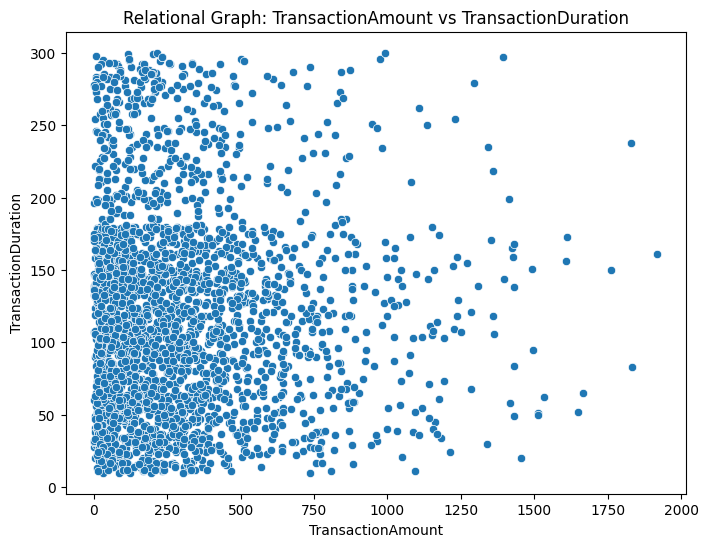

In [ ]:
def plot_relational_graph(data, x_column, y_column):
    """
    Function to plot a relational graph (scatter plot) between two numeric columns.
    Pass two numerical columns of the dataframe to get the scatter plot.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[x_column], y=data[y_column])
    plt.title(f'Relational Graph: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

plot_relational_graph(data, 'TransactionAmount', 'TransactionDuration')


**Categorical Graph (Count Plot)**

Plotting the distribution of the Cluster column (or any other categorical feature).

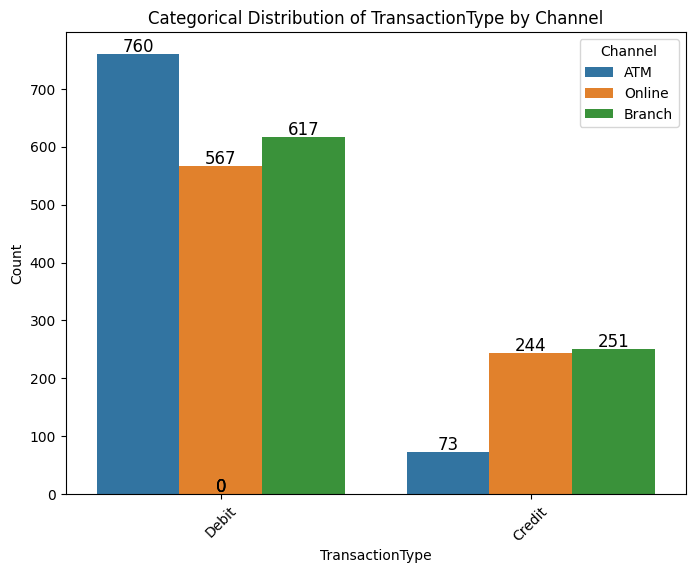

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_graph(data, column, hue_column):
    """
    Function to plot a categorical graph (bar plot) for a categorical column with hue and data labels.
    """
    plt.figure(figsize=(8, 6))

    ax = sns.countplot(x=data[column], hue=data[hue_column])

    # loop for adding data labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'Categorical Distribution of {column} by {hue_column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_categorical_graph(data, 'TransactionType', 'Channel')


**Statistical Graph: Heatmap for Correlation**

Computing the correlation matrix of numeric columns and then plot a heatmap to show the relationships between these columns.

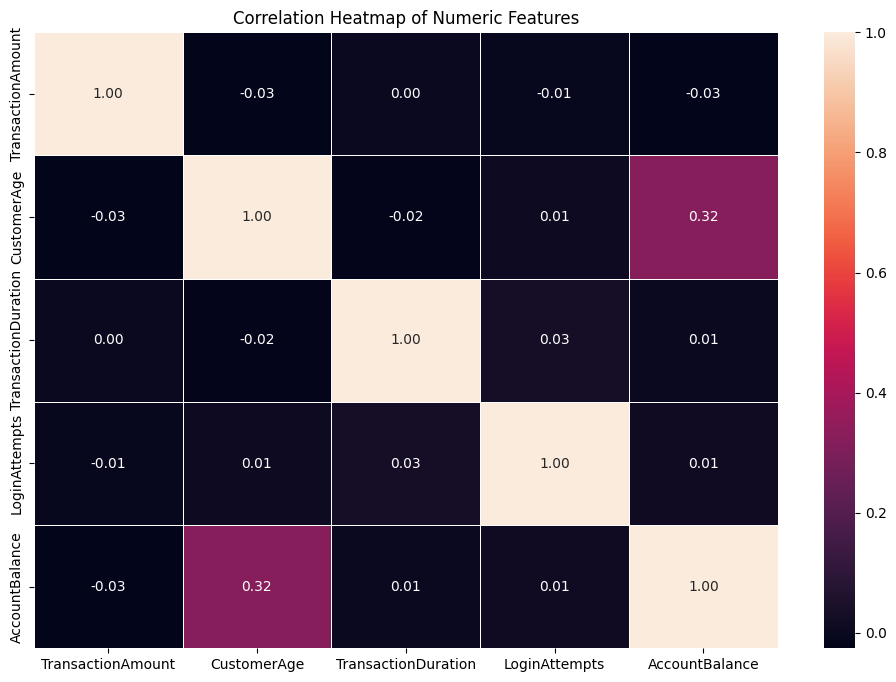

In [ ]:
def plot_statistical_graph(data):
    """
    Function to plot a heatmap of the correlation matrix between numerical features.
    """
    # to select only the numerical columns for heatmap
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    corr_matrix = data[numeric_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

plot_statistical_graph(data)

**Elbow Plot:**

The elbow plot helps to find the optimal number of clusters by plotting the inertia (within-cluster sum of squared distances) for different values of n_clusters.

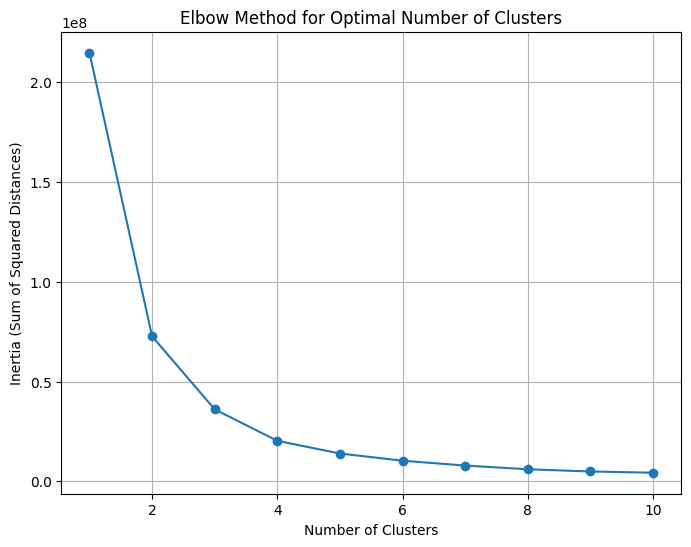

In [ ]:
def plot_elbow(data, features, max_clusters=10):
    """
    Function to plot the elbow method to find the optimal number of clusters.
    """
    inertia = []

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[features])
        inertia.append(kmeans.inertia_)

    # elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.grid(True)
    plt.show()


features_for_clustering = ['TransactionAmount', 'CustomerAge']
plot_elbow(data, features_for_clustering, max_clusters=10)

**Standardizing the data using standard scaler**

StandardScaler: It scales the data so that each feature has a mean of 0 and a standard deviation of 1, which is essential for clustering methods like K-Means.

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_data(data, features):
    """
    Function to scale the specified features in the dataset using StandardScaler.
    """
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    return data

features_to_scale = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']
data = scale_data(data, features_to_scale)

print(data.head())

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128          -0.971275 2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440 2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882 2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456 2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor            -0.552443      -

**Clustering**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def kmeans_clustering(data, features, n_clusters=3):
    """
    Apply K-Means clustering on the data and add the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[features])

    data['DistanceToCentroid'] = np.linalg.norm(data[features] - kmeans.cluster_centers_[data['Cluster']], axis=1)

    return data, kmeans

data_with_clusters, kmeans_model = kmeans_clustering(data, features_to_scale, n_clusters=3)

print(data_with_clusters.head())

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128          -0.971275 2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440 2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882 2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456 2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor            -0.552443      -

**Splitting the data for training and testing**

In [ ]:
# Features for clustering
X = data_with_clusters[features_to_scale]
y = data_with_clusters['Cluster']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (2009, 3)
Testing set shape: (503, 3)


**Plot Clusters**

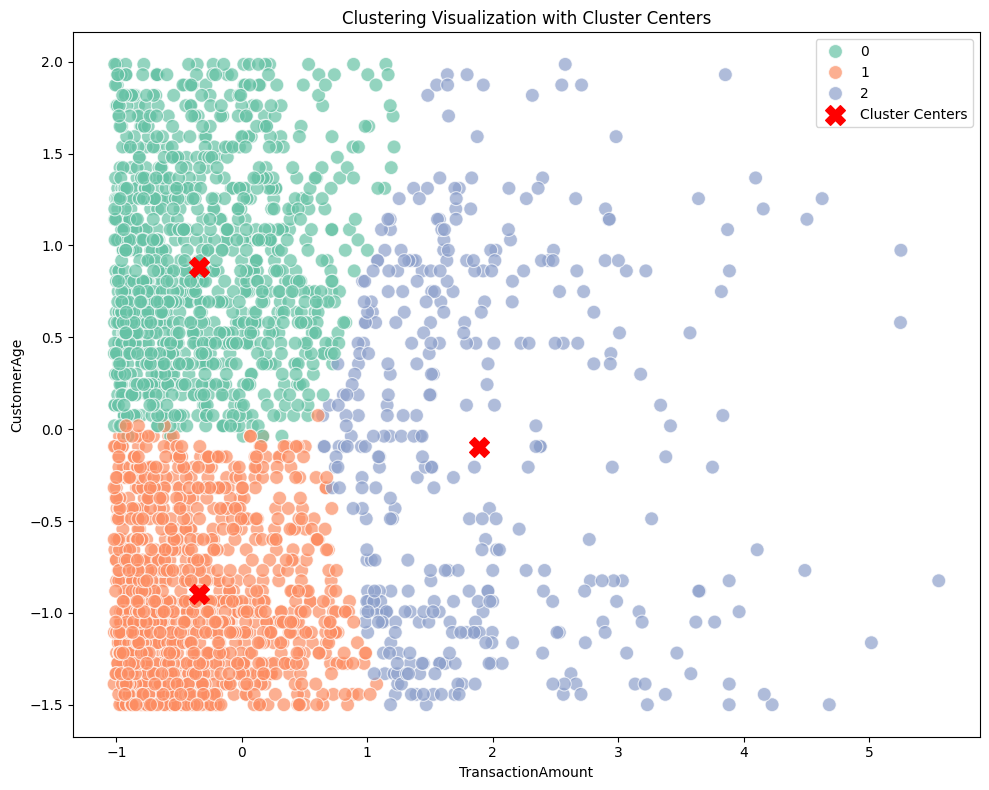

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data[features_to_scale[0]], y=data[features_to_scale[1]], hue=data['Cluster'], palette='Set2', s=100, alpha=0.7)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('Clustering Visualization with Cluster Centers')
plt.xlabel(features_to_scale[0])
plt.ylabel(features_to_scale[1])
plt.legend()
plt.tight_layout()
plt.show()

**Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def train_kmeans_clustering(X_train, features, n_clusters=3):
    """
    Train KMeans clustering on X_train
    """

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[features])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    X_train['Cluster'] = kmeans.fit_predict(X_train_scaled)

    return kmeans, X_train, scaler

clustering_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']
kmeans, X_train, scaler = train_kmeans_clustering(X_train, clustering_features, n_clusters=3)


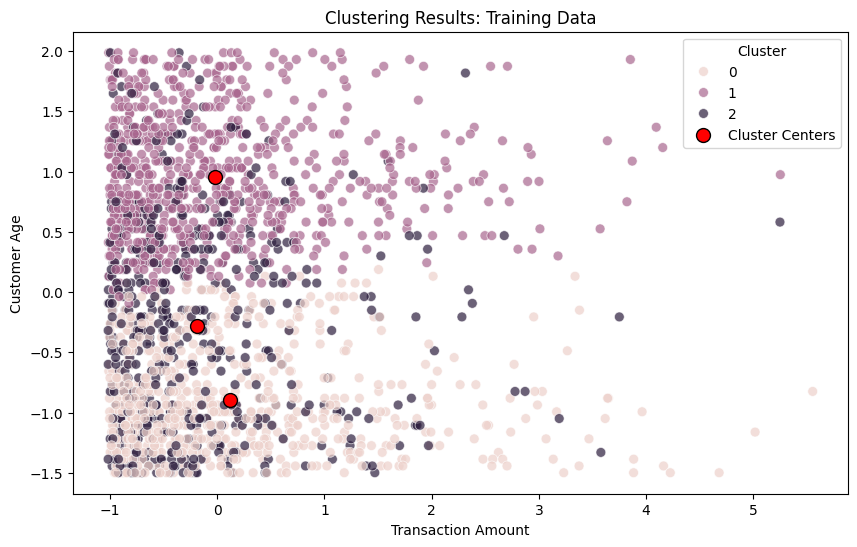

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_train['TransactionAmount'],
    y=X_train['CustomerAge'],
    hue=X_train['Cluster'],
    s=50, alpha=0.7
)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red', s=100, label='Cluster Centers', edgecolor='black'
)

plt.title('Clustering Results: Training Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.legend(title='Cluster')
plt.show()


**Fitting**

In [ ]:
def train_decision_tree(X_train, y_train, features):
    """
    Train DecisionTreeClassifier on X_train to predict clusters.
    """
    classifier = DecisionTreeClassifier(random_state=0, max_depth = 3)
    classifier.fit(X_train[features], y_train)
    return classifier

fitting_features = ['CustomerAge', 'TransactionAmount', 'TransactionDuration']
decision_tree_model = train_decision_tree(X_train, X_train['Cluster'], fitting_features)

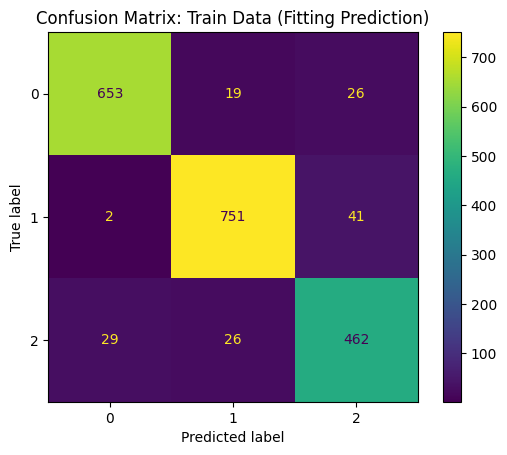

Accuracy of training data: 0.9288203086112494


In [ ]:
y_pred_train  = decision_tree_model.predict(X_train[fitting_features])

cm_train = confusion_matrix(X_train['Cluster'], y_pred_train)
accuracy = accuracy_score(X_train['Cluster'], y_pred_train)
# confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=decision_tree_model.classes_)
disp_test.plot()
plt.title('Confusion Matrix: Train Data (Fitting Prediction)')
plt.show()
print(f'Accuracy of training data: {accuracy}')

**Clustering prediction**

In [ ]:
def predict_clusters_and_target(X_test, kmeans, scaler, clustering_features, fitting_features):
    """
    Predict clusters using KMeans
    """
    X_test_scaled = scaler.transform(X_test[clustering_features])
    X_test['Cluster'] = kmeans.predict(X_test_scaled)
    return X_test

X_test = predict_clusters_and_target(X_test, kmeans, scaler, clustering_features, fitting_features)


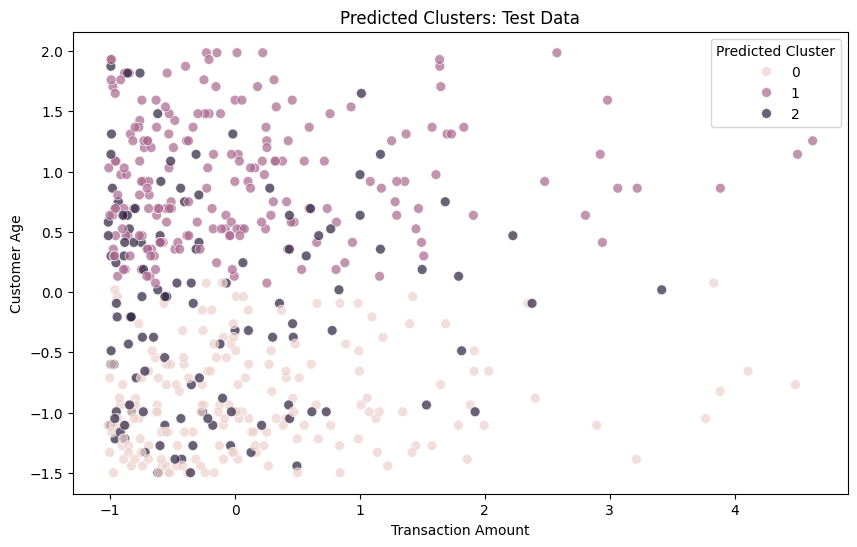

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_test['TransactionAmount'],
    y=X_test['CustomerAge'],
    hue=X_test['Cluster'],
    s=50, alpha=0.7
)

plt.title('Predicted Clusters: Test Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.legend(title='Predicted Cluster')
plt.show()


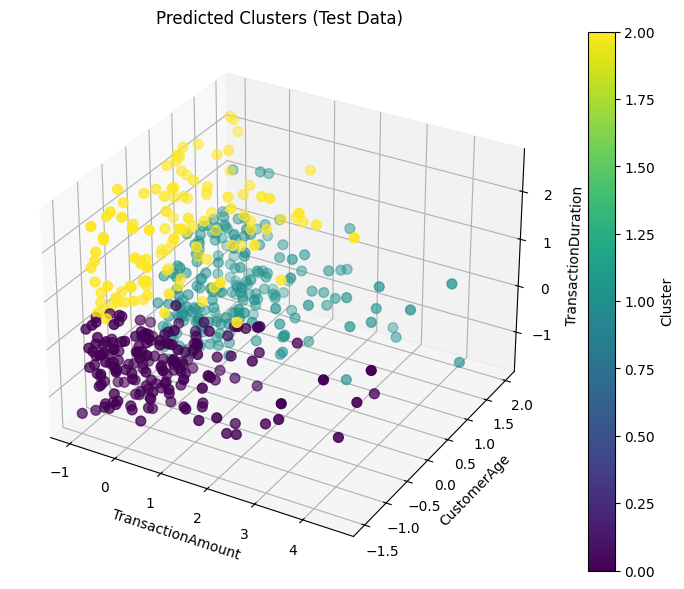

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test['TransactionAmount'], X_test['CustomerAge'], X_test['TransactionDuration'], c=X_test['Cluster'], cmap='viridis', s=50)

ax.set_title("Predicted Clusters (Test Data)")
ax.set_xlabel("TransactionAmount")
ax.set_ylabel("CustomerAge")
ax.set_zlabel("TransactionDuration")
plt.colorbar(scatter, label="Cluster")
plt.show()

**Fitting Prediction**

In [ ]:
def predict_fitting(X_test, classifier, features):
    """
    Function to make predictions for the target variable (clusters) on the test data.
    """
    y_pred = classifier.predict(X_test[features])

    accuracy = accuracy_score(X_test['Cluster'], y_pred)

    return y_pred, accuracy

y_pred_test, test_accuracy = predict_fitting(X_test, decision_tree_model, fitting_features)

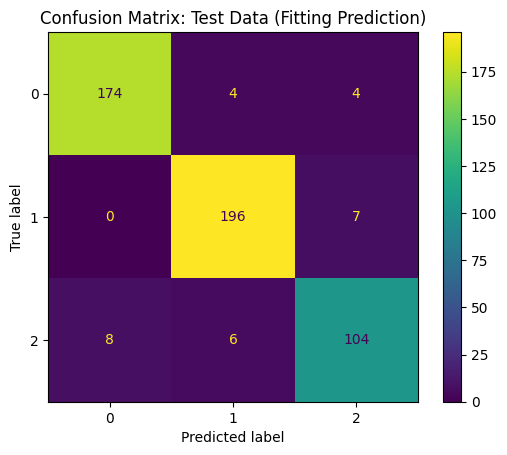

Test Accuracy: 0.94


In [ ]:
y_pred = decision_tree_model.predict(X_test[fitting_features])

cm = confusion_matrix(X_test['Cluster'], y_pred)

# confusion matrix of test data
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_)
disp.plot()
plt.title('Confusion Matrix: Test Data (Fitting Prediction)')
plt.show()
print(f"Test Accuracy: {test_accuracy:.2f}")